# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [492]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter
import dlib

### Step 1

Load an image (any image that contains faces).

(3024, 4032, 3)


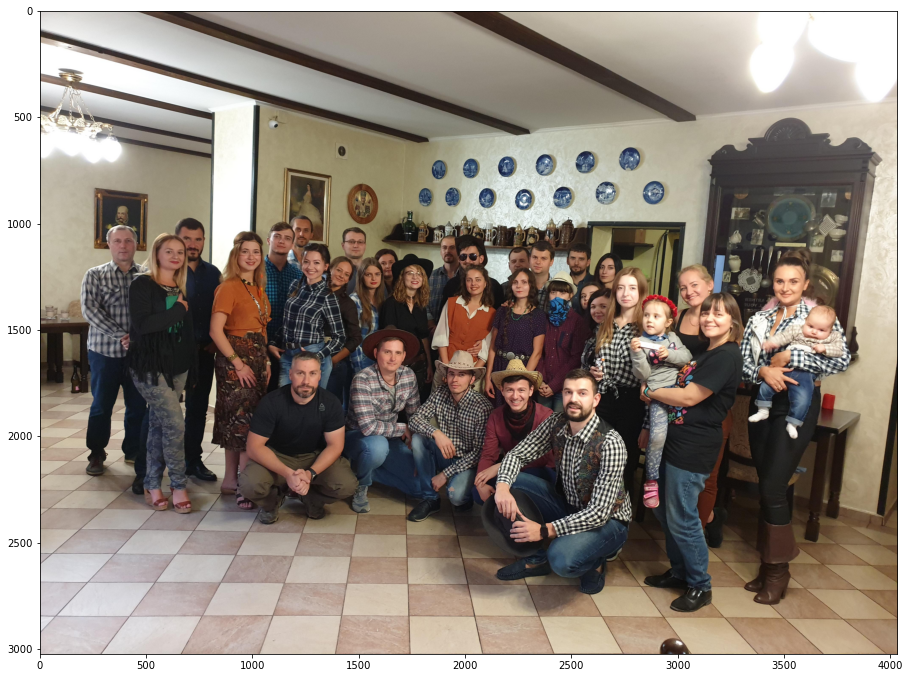

In [493]:
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(img)
    print(img.shape)
    return img, gray

impath = 'imgs/party.jpg'
# impath = 'imgs/color_faces.png'
img, gray = load_image(impath)

### Step 2

Load the dlib face predictor.

In [494]:
# Let's load the detector
detector = dlib.get_frontal_face_detector()
# Detect faces, see http://dlib.net/face_detector.py.html

### Step 3

Run the predictor on your image.

In [495]:
def detect_faces(image, detector, upsampling=1, adj=0):
    start = perf_counter()
    # 1 --> upsampling factor
#     rects = detector(image, upsampling)
    rects, scores, idx = detector.run(image, upsampling, adj)
    elapsed = perf_counter() - start
    print(f'Elapsed time: {elapsed} seconds')
    print('Number of detected faces:', len(rects))
    # print(rects)
    # print(rects[0].left)
    return rects, scores

face_frames, scores = detect_faces(gray, detector, upsampling=0)

Elapsed time: 0.9528086000063922 seconds
Number of detected faces: 30


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<matplotlib.image.AxesImage at 0x24a0e4d4d00>, Text(0.5, 1.0, 'dlib'))

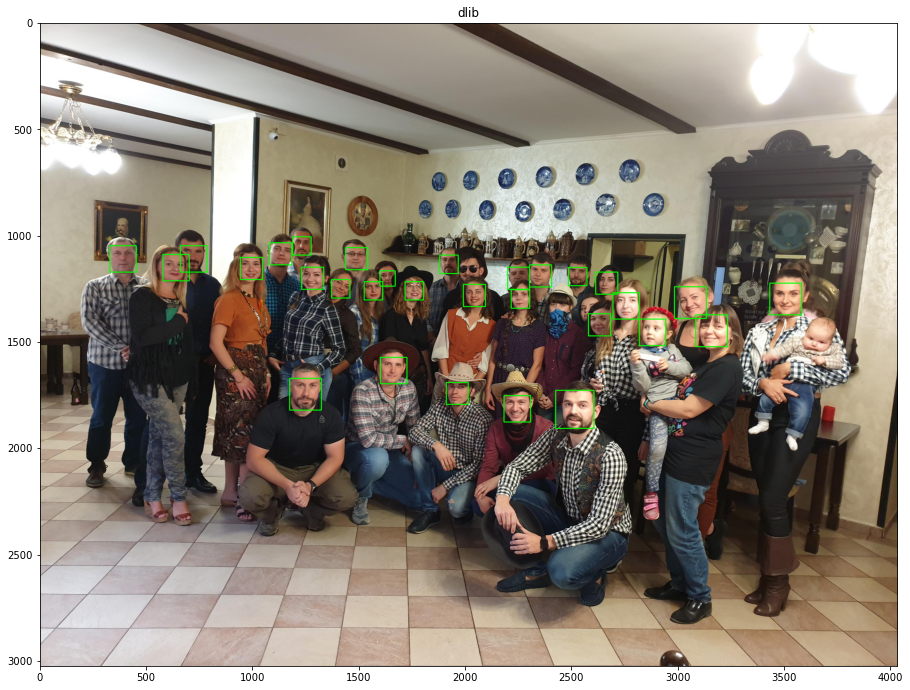

In [496]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

# Draw rectangles {rects} around every face found on {image}.
def mark_faces(image, rects, color=(0, 255, 0)):
    # Draw rectangle around each face
    result_image = np.copy(image)
    face_tiles = []
    rows, cols = image.shape[0:2]
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)

        # in some cases x or y may be negative - this raises errors in the next block of code showing face tiles 
        x = np.clip(x, 0, cols)
        y = np.clip(y, 0, rows)

#         print(x, y, w, h)
        cv2.rectangle(result_image, (x, y), (x+w, y+h), color, 3)
        face_tiles.append(image[y:y+h, x:x+w])
    return result_image, face_tiles

image_with_frames, face_tiles = mark_faces(img, face_frames)
plt.imshow(image_with_frames), plt.title('dlib')

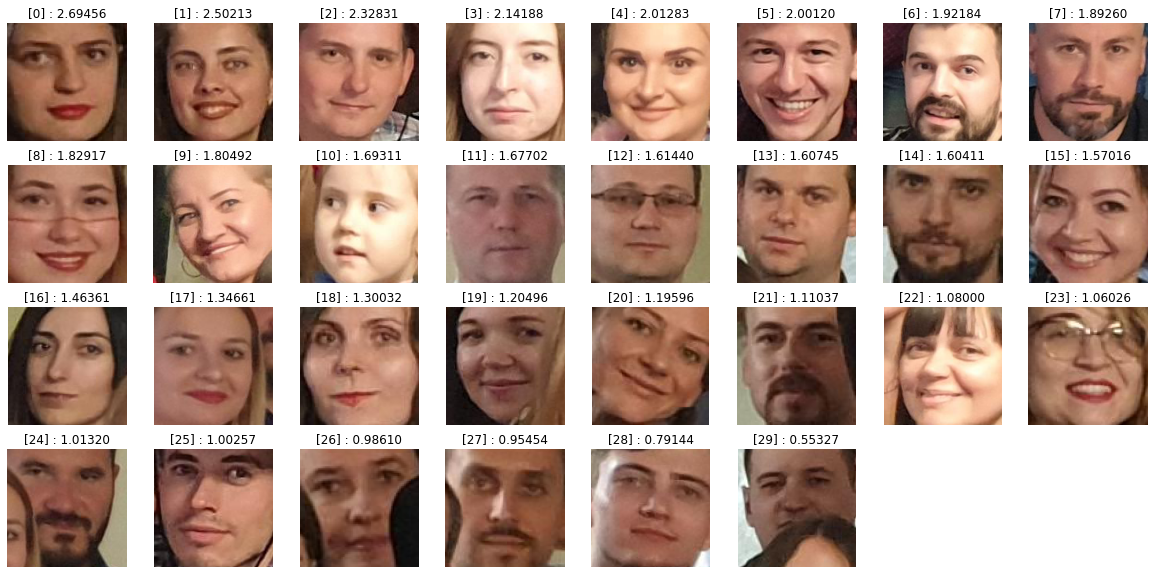

In [497]:
faces_in_a_row = 8

def show_face_tiles(face_tiles, scores):
    for face_index in range(len(face_tiles)):
        face = face_tiles[face_index]
        plt.subplot(len(face_tiles)//faces_in_a_row+1, faces_in_a_row, face_index+1), 
        plt.imshow(face), 
        plt.title(f'[{face_index}] : '+'{:.5f}'.format(scores[face_index])), 
        plt.axis('off')

plt.rcParams['figure.figsize'] = [2.56*faces_in_a_row, 2.56*len(face_tiles)//faces_in_a_row+1]
show_face_tiles(face_tiles, scores)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

### Comments and thoughts
It does not recognize faces at all on the image below (a lot of people in the stadium) with an upsampling factor of 1, though it works with 2 and more.
In some situations dlib works better with colored image - it does detect more faces, in some other situations a grayscale image gives better results. 
I guess if a face is depicted with a low number of pixels - a small face - colored image gives more information and more distinctive features thus dlib recognizes more faces. If a high-res image contains large faces dlib might give better results with a grayscale image. A large number of colored pixels produces a lot of noise while grayscaling removes much of that noise and may give better results.
In any case, it takes less time to process a grayscale image than a colored one.

(586, 880, 3)


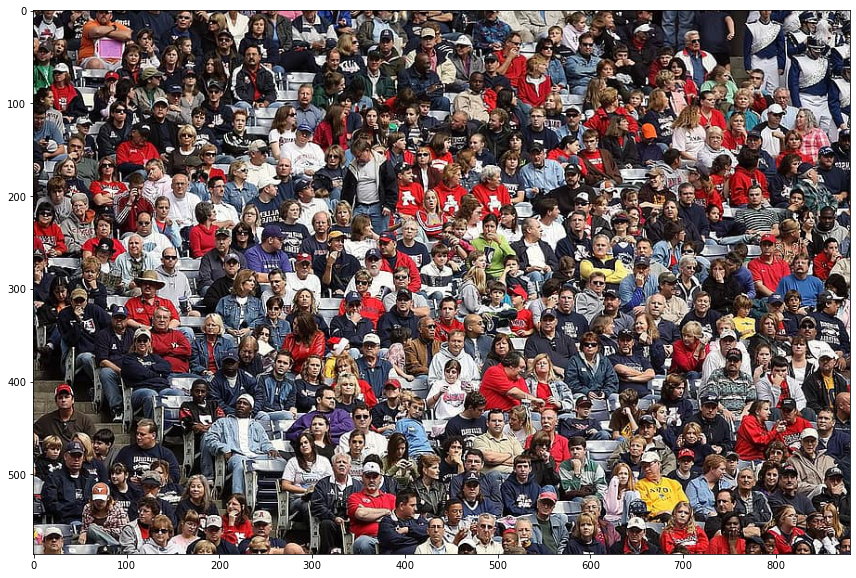

In [498]:
impath = 'imgs/stadium_big.jpg'
colored_img, gray_img = load_image(impath)

Processing colored image...
Elapsed time: 0.9425430999835953 seconds
Number of detected faces: 134

Processing grayscale image...
Elapsed time: 0.6720061000087298 seconds
Number of detected faces: 124


(<AxesSubplot:title={'center':'Grayscale'}>,
 Text(0.5, 1.0, 'Grayscale'))

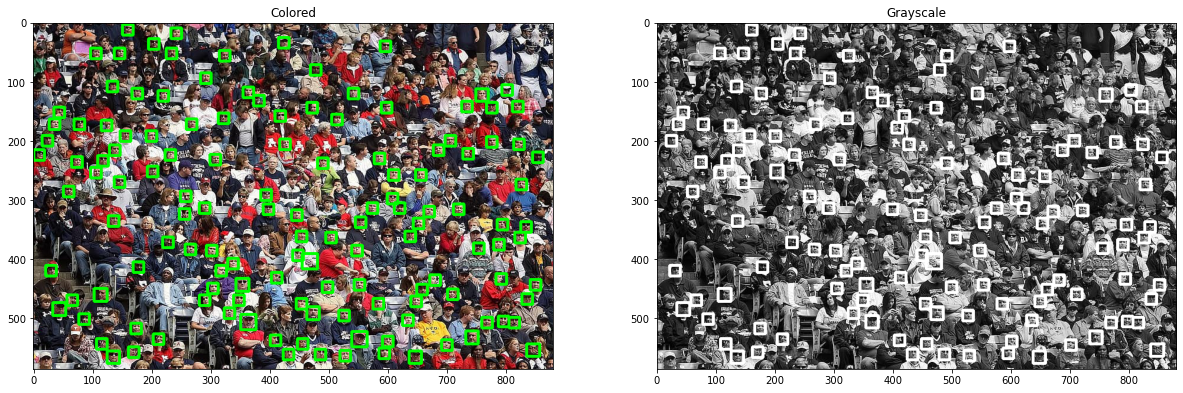

In [499]:
detector = dlib.get_frontal_face_detector()

# Below is an example where a colored image works better than a grayscale

# COLORED
print(f'Processing colored image...')
colored_face_frames, colored_scores = detect_faces(colored_img, detector, upsampling=2, adj=-0.5)
print()

#GRAYSCALE
print(f'Processing grayscale image...')
gray_face_frames, gray_scores = detect_faces(gray_img, detector, upsampling=2, adj=-0.5)

colored_image_with_frames, colored_face_tiles = mark_faces(colored_img, colored_face_frames)
gray_image_with_frames, gray_face_tiles = mark_faces(gray_img, gray_face_frames, color=(255, 255, 255))

plt.subplot(1, 2, 1), plt.imshow(colored_image_with_frames), plt.title('Colored')
plt.subplot(1, 2, 2), plt.imshow(gray_image_with_frames, cmap='gray'), plt.title('Grayscale')

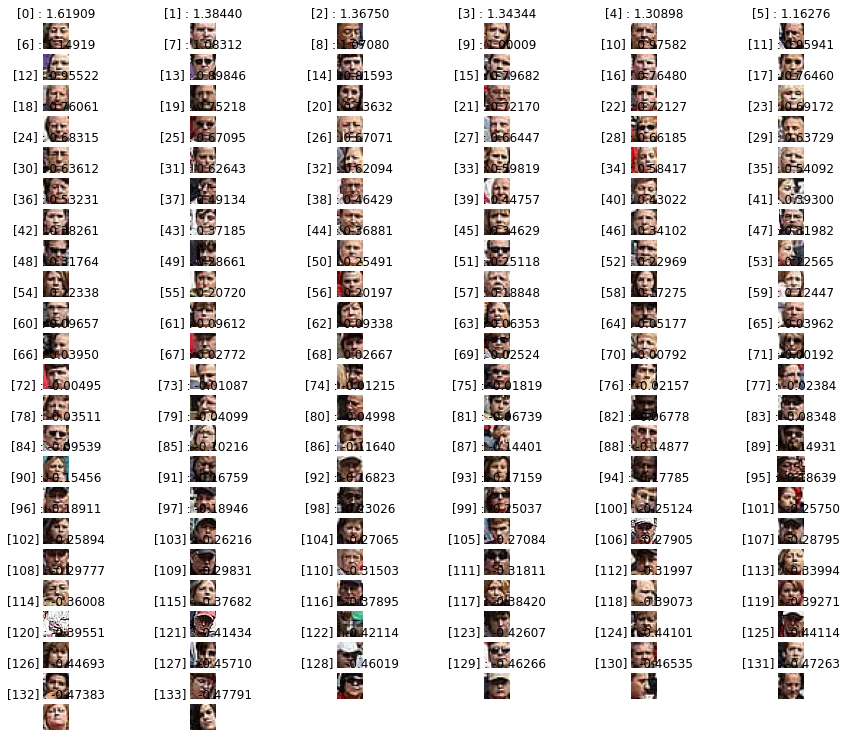

In [500]:
faces_in_a_row = 6
plt.rcParams['figure.figsize'] = [2.56*faces_in_a_row, 2.56*len(face_tiles)//faces_in_a_row+1]
show_face_tiles(colored_face_tiles, colored_scores)

(525, 700, 3)


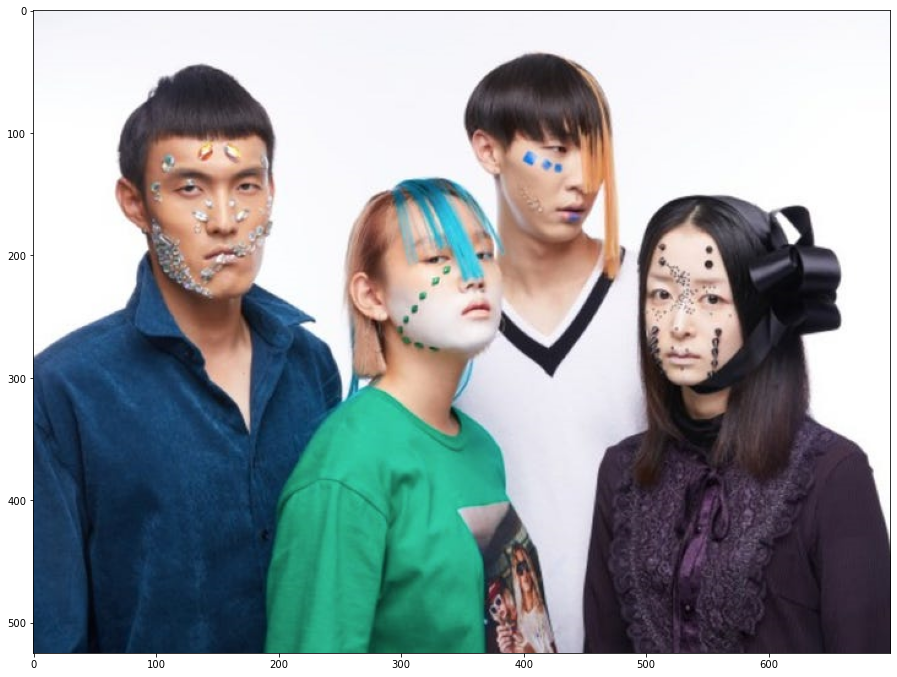

In [501]:
# Below is an example where grayscale image gives better results that a colored one
impath = 'imgs/color_faces.png'
colored_img, gray_img = load_image(impath)

Processing colored image...
Elapsed time: 0.16667870001401752 seconds
Number of detected faces: 3

Processing grayscale image...
Elapsed time: 0.12026560000958852 seconds
Number of detected faces: 4


(<AxesSubplot:title={'center':'Grayscale'}>,
 Text(0.5, 1.0, 'Grayscale'))

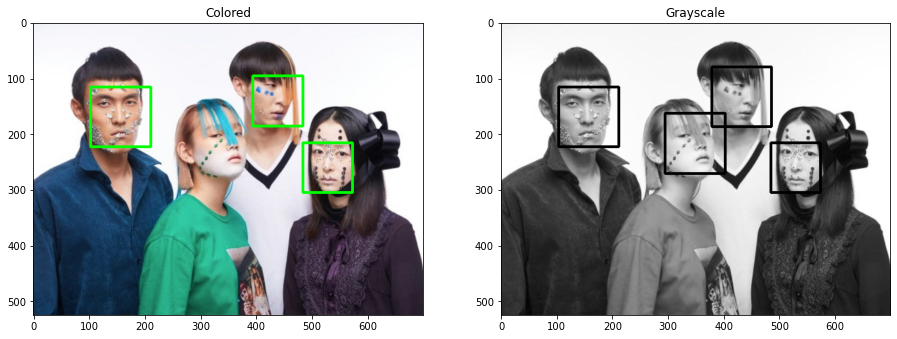

In [502]:
detector = dlib.get_frontal_face_detector()

# COLORED
print(f'Processing colored image...')
colored_face_frames, colored_scores = detect_faces(colored_img, detector, upsampling=1, adj=0)
print()

#GRAYSCALE
print(f'Processing grayscale image...')
gray_face_frames, gray_scores = detect_faces(gray_img, detector, upsampling=1, adj=0)

colored_image_with_frames, colored_face_tiles = mark_faces(colored_img, colored_face_frames)
gray_image_with_frames, gray_face_tiles = mark_faces(gray_img, gray_face_frames)

plt.subplot(1, 2, 1), plt.imshow(colored_image_with_frames), plt.title('Colored')
plt.subplot(1, 2, 2), plt.imshow(gray_image_with_frames, cmap='gray'), plt.title('Grayscale')


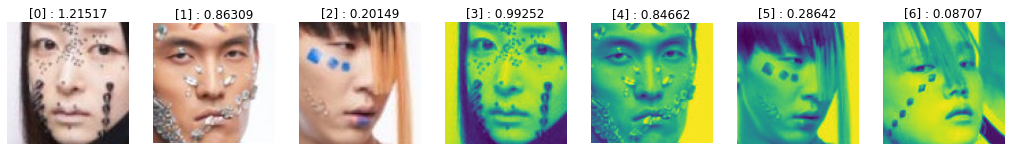

In [504]:
faces_in_a_row = 8
plt.rcParams['figure.figsize'] = [2.56*faces_in_a_row, 2.56*len(face_tiles)//faces_in_a_row+1]
show_face_tiles(colored_face_tiles+gray_face_tiles, colored_scores+gray_scores)